<a href="https://colab.research.google.com/github/jouninLRMD/jouninlrmd/blob/master/Opi_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#Read the data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(30, 12)})
sns.set_style("darkgrid")
from google.colab import drive

drive.mount('/content/gdrive')

path_py_file = r'/content/gdrive/MyDrive/'
dir = os.path.dirname(path_py_file)
data_to_analyze = pd.read_csv(dir + "/Opi_data_prueba_reduce.csv")
#Check the head of the dataframe
data_to_analyze.head()
data_to_analyze['_id'].is_unique
data_to_analyze = data_to_analyze.set_index('_id')
data_to_analyze.loc[2806]
#data_to_analyze.set_index('_id', inplace=True)
data_to_analyze.dtypes.value_counts()
data_to_analyze['ao_hechos'].isnull().sum() / len(data_to_analyze)
data_success_year = data_to_analyze['alcaldia_hechos']

data_to_analyze=data_to_analyze[['fecha_inicio','delito']]
data_to_analyze.index=pd.to_datetime(data_to_analyze['fecha_inicio'])
data_to_analyze=data_to_analyze.drop(["fecha_inicio"],axis=1)

import plotly.express as px
fig=px.line(data_to_analyze, x=data_to_analyze.index, y='delito', title='delito with Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()


from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(list(data_to_analyze['delito']), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')


# KPSS Test
stats, p, lags, critical_values = kpss(list(data_to_analyze['delito']), 'ct')
print(f'KPSS Test Statistics: {stats}')
print(f'p-value: {p}')

if p<0.05:
      print('Series is not Stationary')
else:
      print('Series is Stationary')

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Calculate ACF and PACF upto 50 lags
acf_50 = acf(data_to_analyze['delito'], nlags=100)
pacf_50 = pacf(data_to_analyze['delito'], nlags=100)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 600)
plot_acf(acf_50, lags=50, ax=axes[0])
plot_pacf(pacf_50, lags=50, ax=axes[1])






from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Additive Decomposition
result_add = seasonal_decompose(data_to_analyze['delito'].value_counts()[1], model='additive', extrapolate_trend='freq')
# Plot
result_add.plot().suptitle('Additive Decompose', fontsize=22)

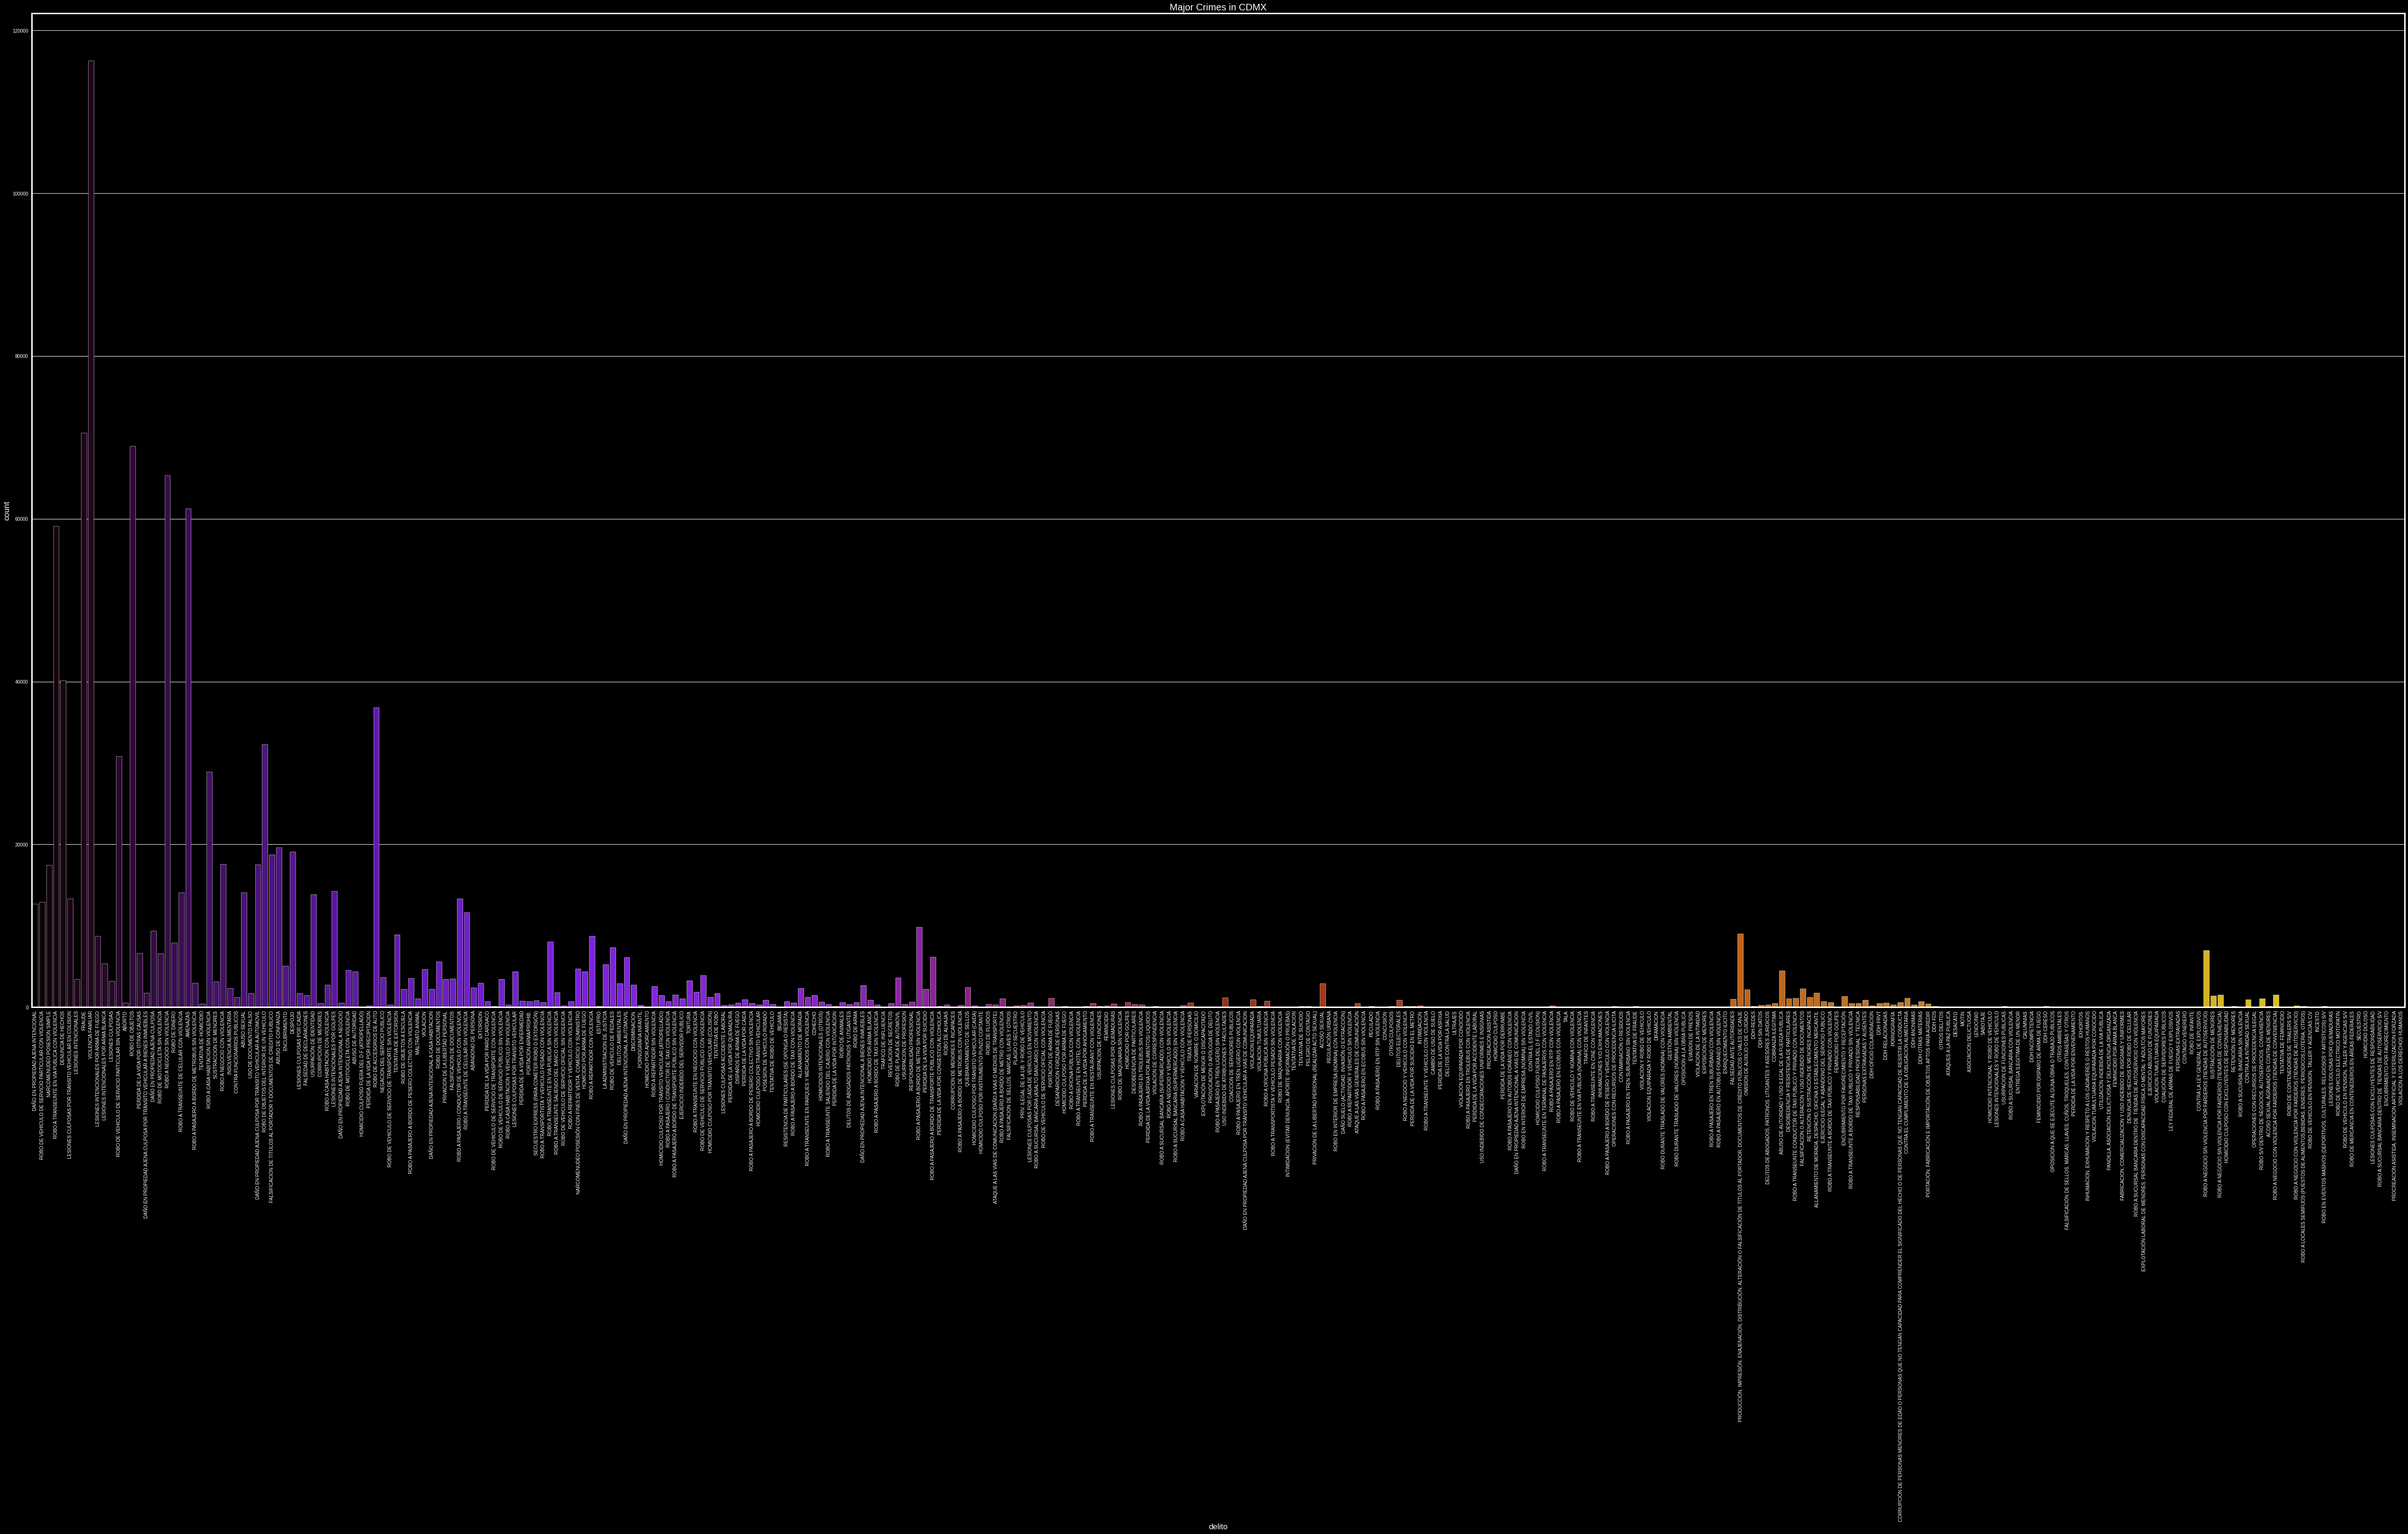

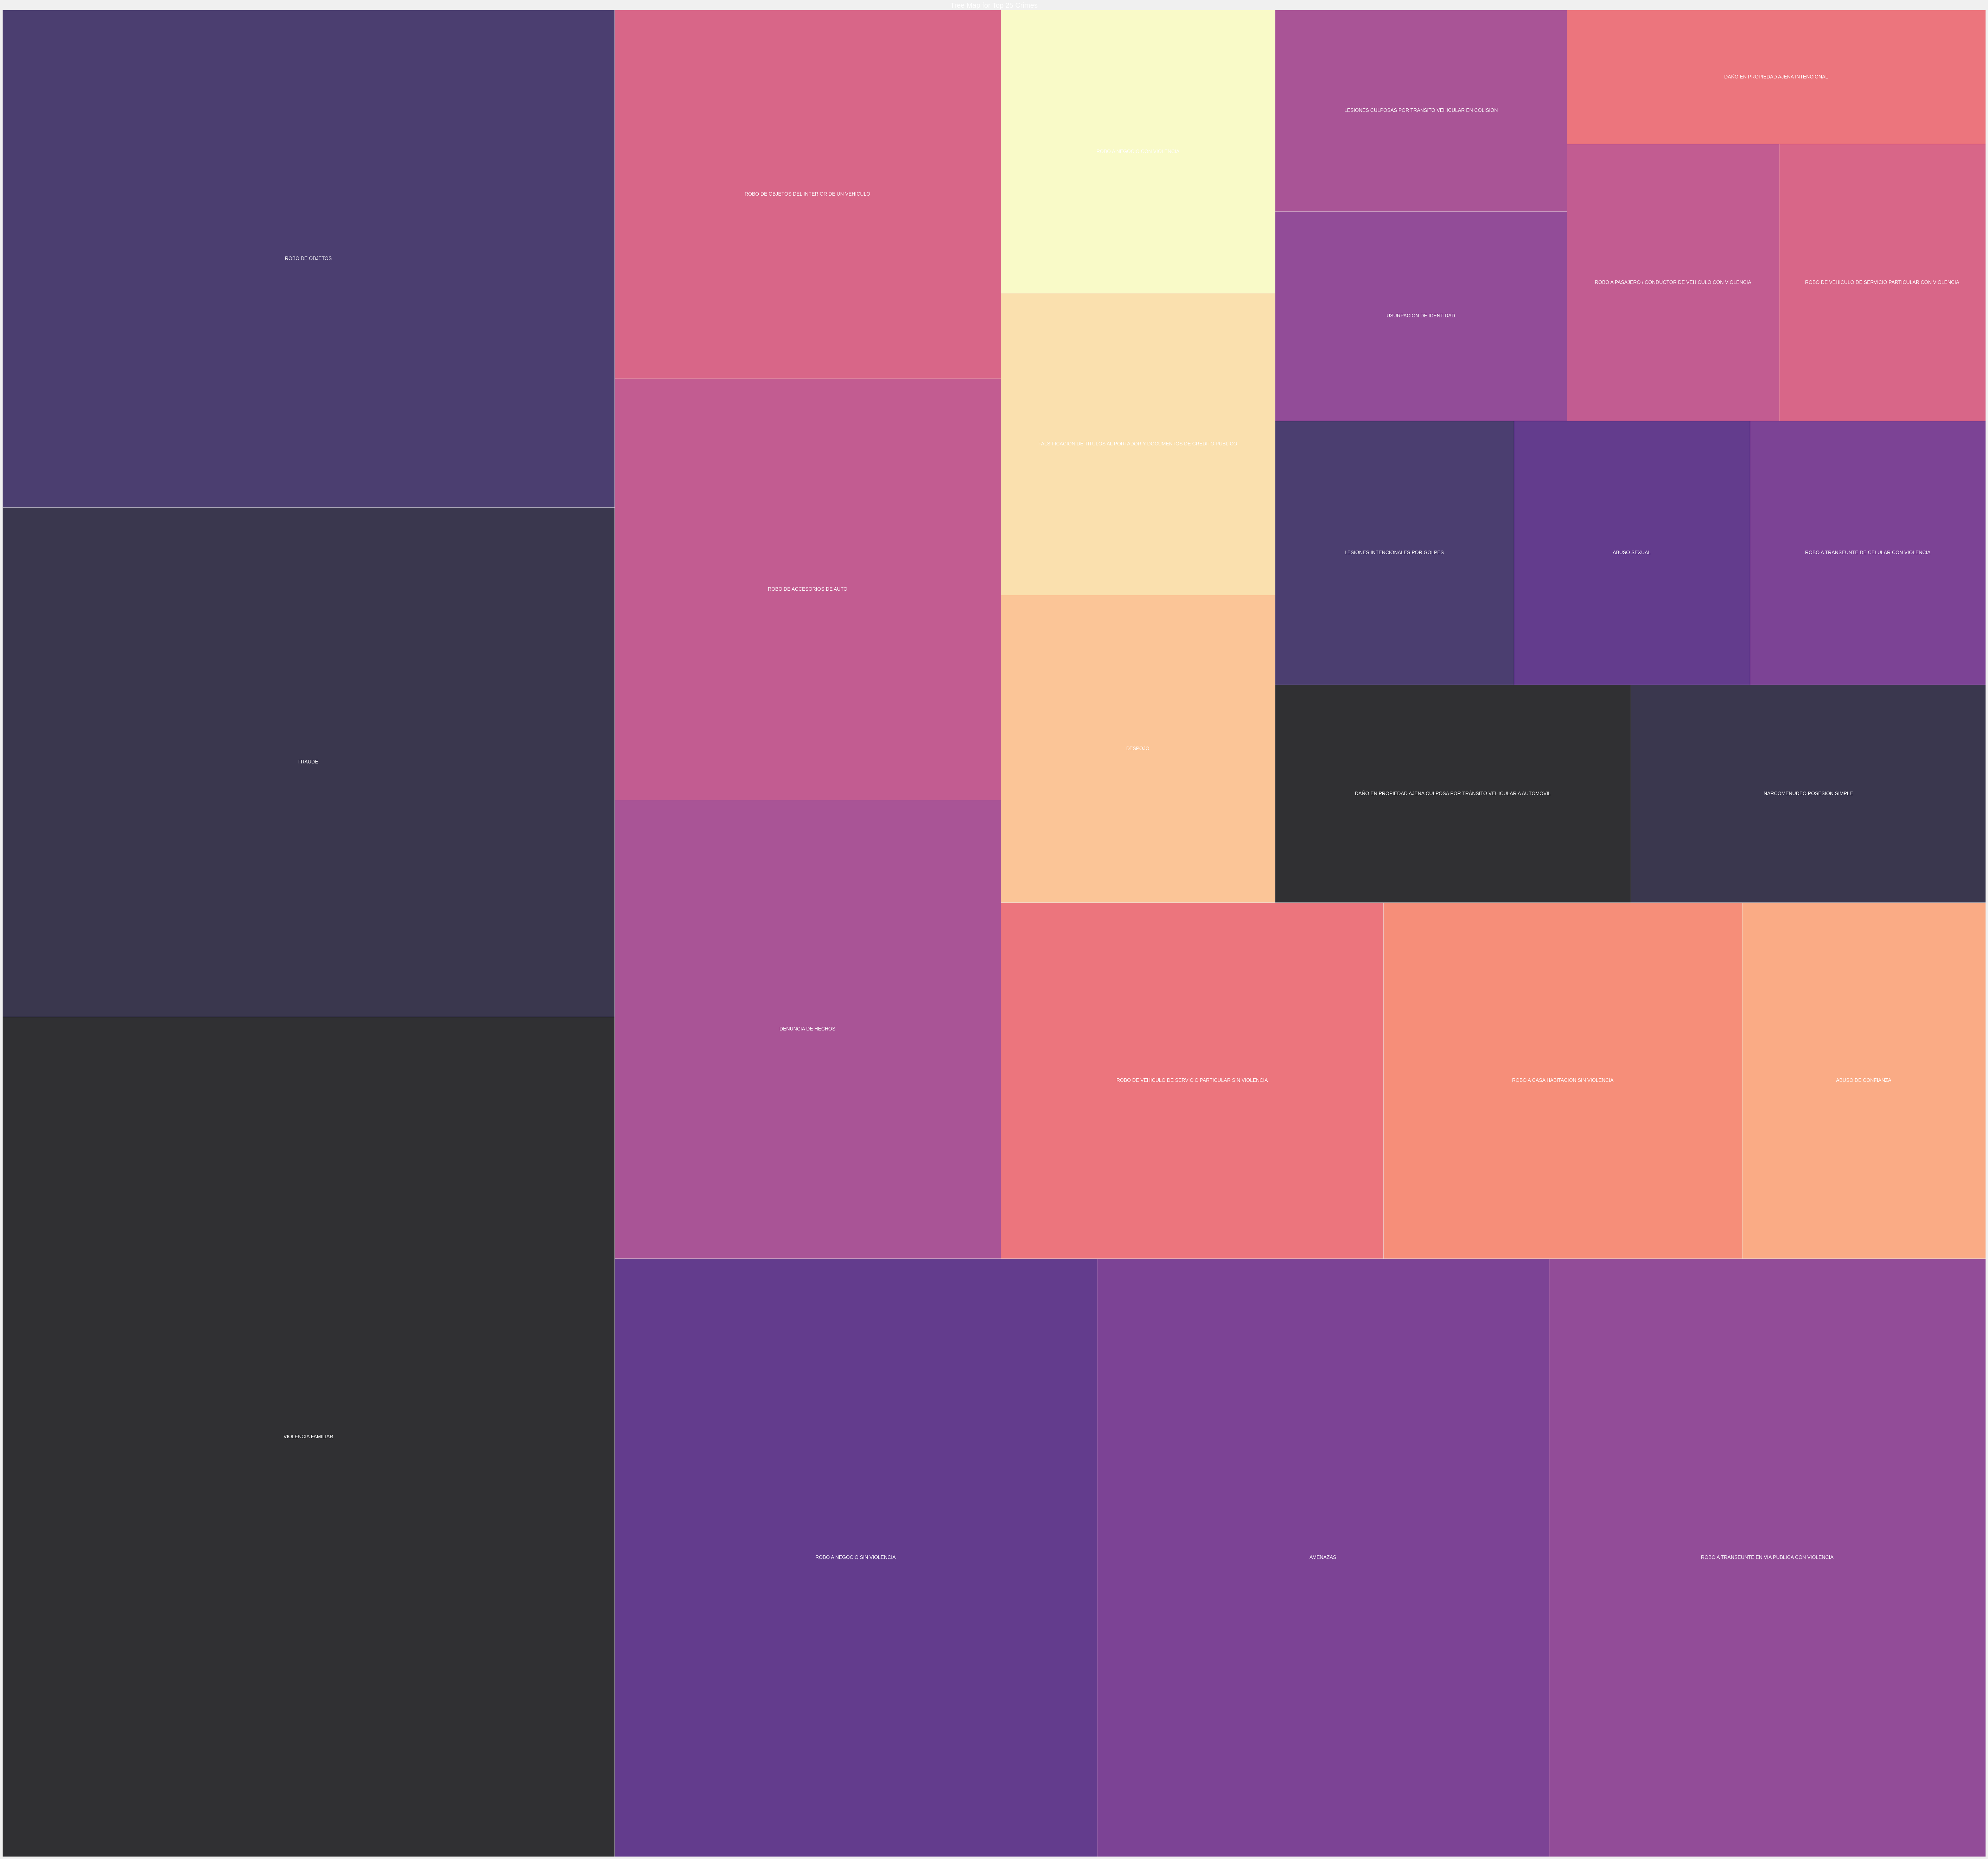

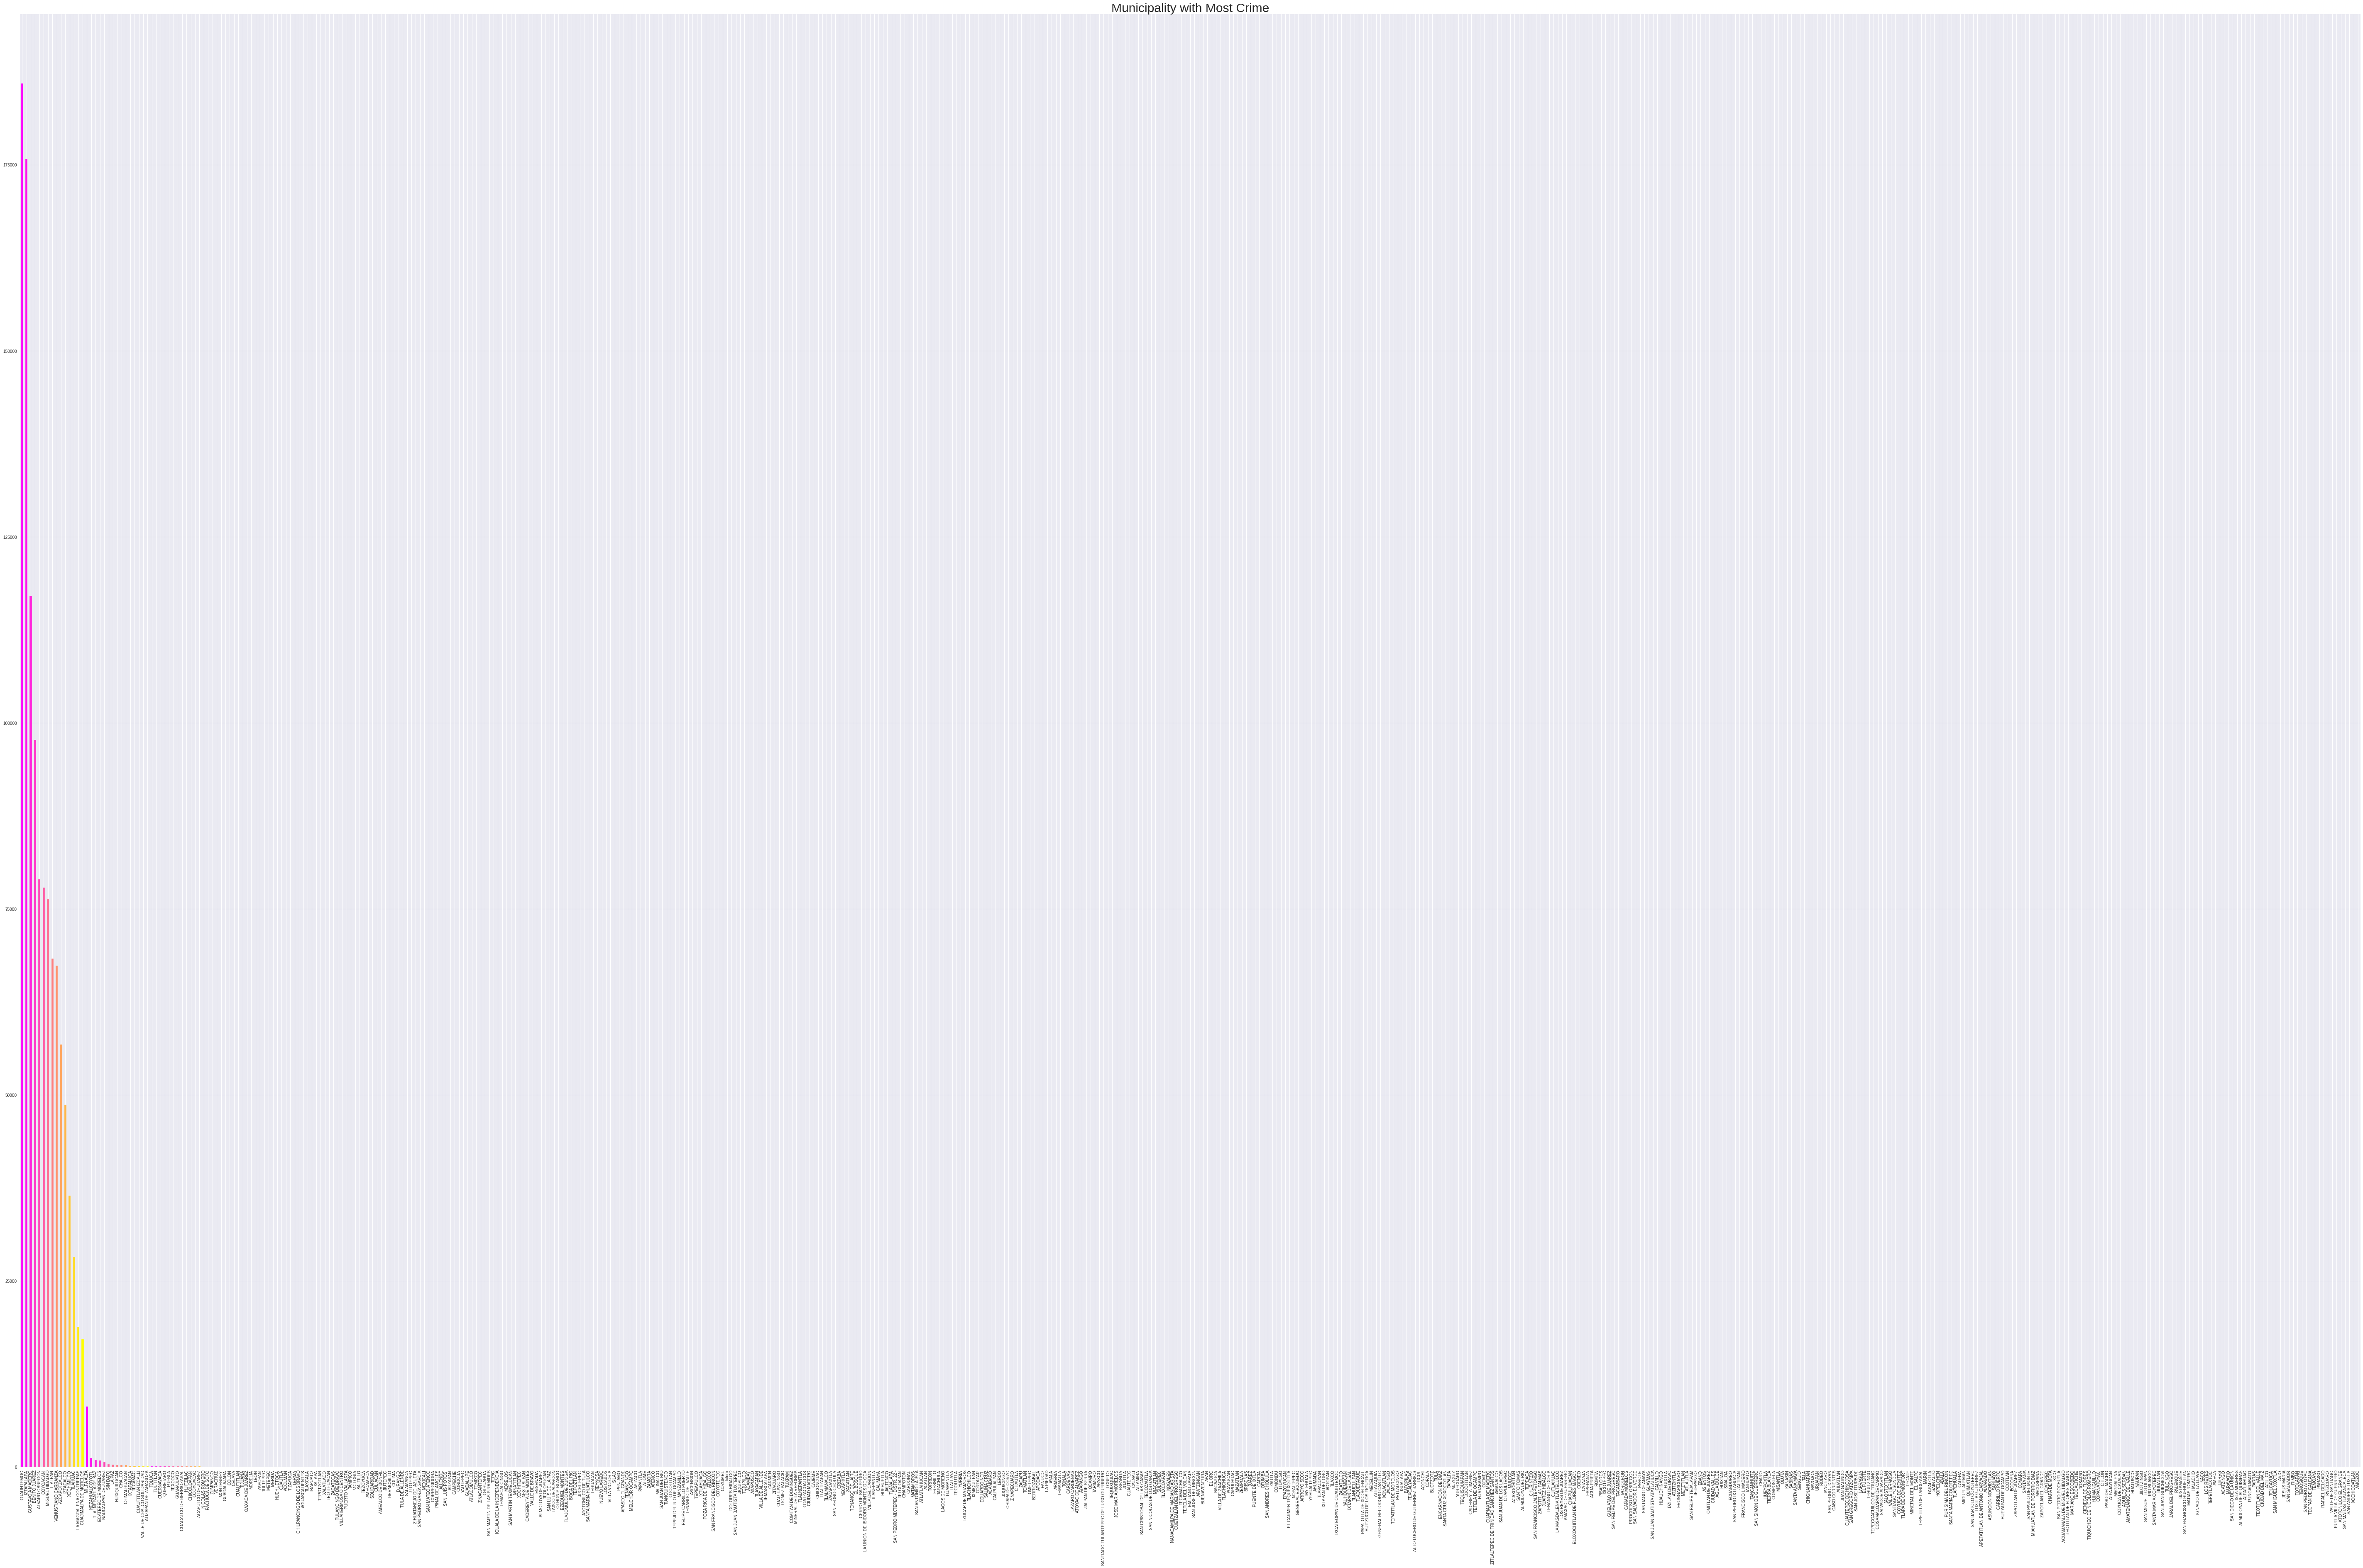

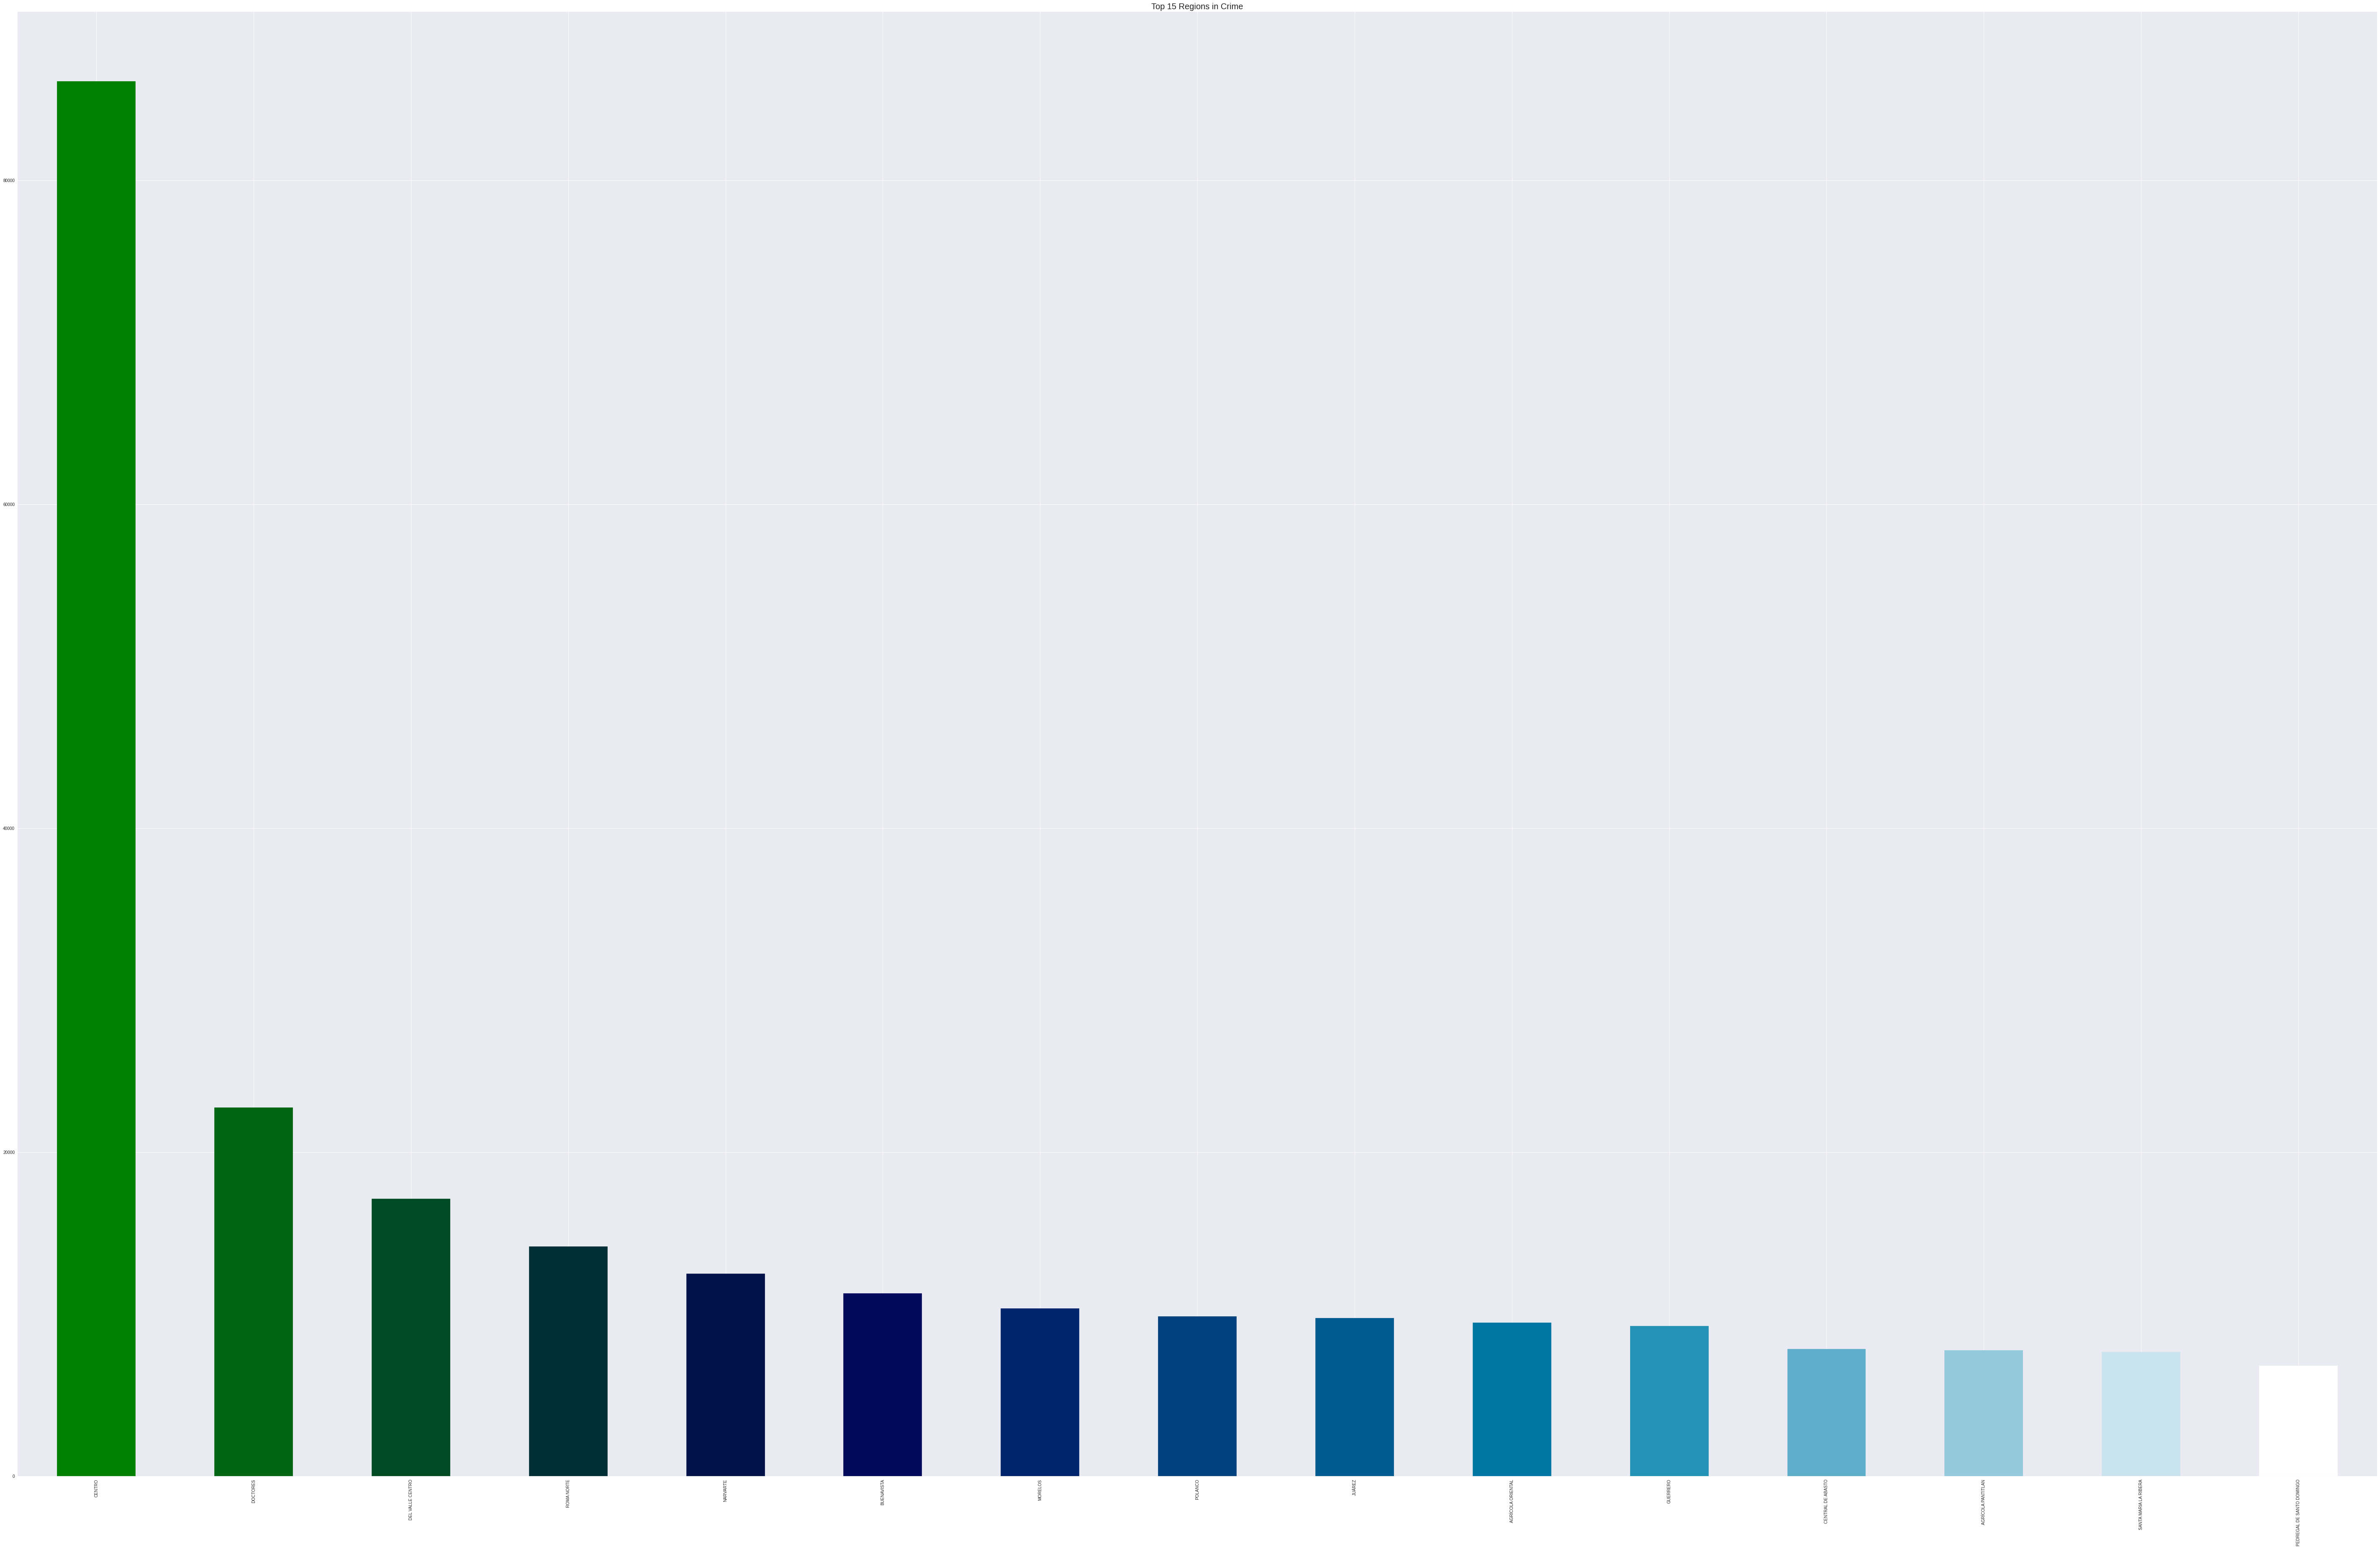

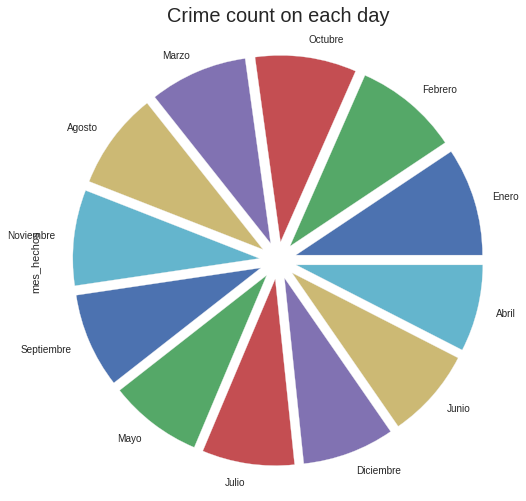

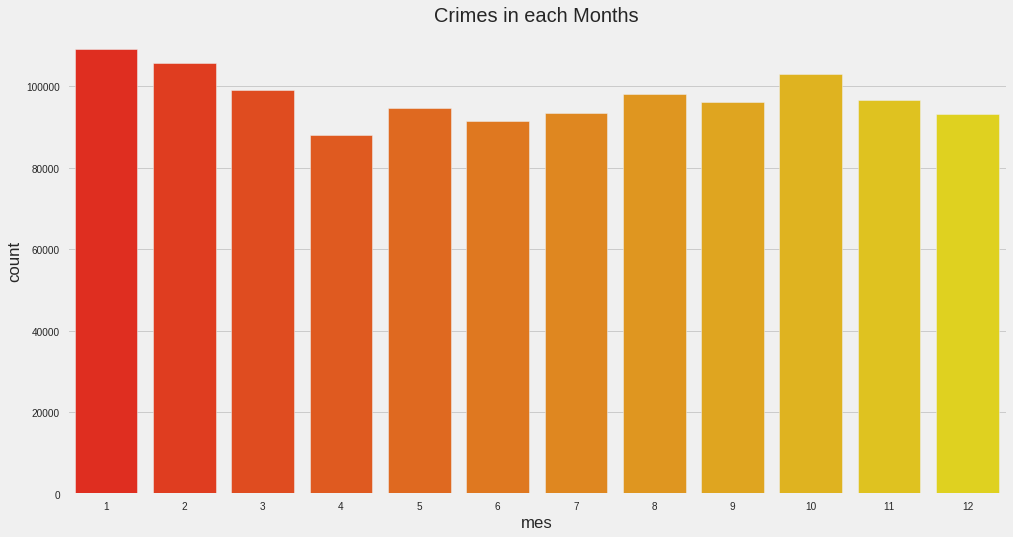

In [202]:
#@title
#!pip install  folium
#!pip install squarify
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify
import datetime

# for providing path
path_py_file = r'/content/gdrive/MyDrive/'
dir = os.path.dirname(path_py_file)
data = pd.read_csv(dir + "/Opi_data_prueba.csv")

data.shape
# checking the head of the data

data.head()
# describing the data

data.describe()
# checking if there are any null values

data.isnull().sum()
#Dropping tempo column

#data.drop('tempo', axis=1, inplace=True)
# filling the missing value in columns using the mode values
data['mes_hechos'].fillna(data['mes_hechos'].mode()[0], inplace = True)
data['fecha_hechos'].fillna(data['fecha_hechos'].mode()[0], inplace = True)
data['unidad_investigacion'].fillna(data['unidad_investigacion'].mode()[0], inplace = True)
data['colonia_hechos'].fillna(data['colonia_hechos'].mode()[0], inplace = True)
data['alcaldia_hechos'].fillna(data['alcaldia_hechos'].mode()[0], inplace = True)
data['calle_hechos'].fillna(data['calle_hechos'].mode()[0], inplace = True)

data.isnull().any().any()
# different categories of crime

plt.rcParams['figure.figsize'] = (80, 36)
plt.style.use('dark_background')

sns.countplot(data['delito'], palette = 'gnuplot')

plt.title('Major Crimes in CDMX', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

# plotting a tree map

y = data['delito'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (90, 90)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()


# description of the crime

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (150, 150)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(data['categoria_delito']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (120, 54)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 1, 15))
data['alcaldia_hechos'].value_counts().plot.bar(color = color, figsize = (90, 60))

plt.title('Municipality with Most Crime',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['colonia_hechos'].value_counts().head(15).plot.bar(color = color, figsize = (90, 60))

plt.title('Top 15 Regions in Crime',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()
# Regions with count of crimes

plt.style.use('seaborn')


data['mes_hechos'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()
#Crimes in each Months
data['fecha_hechos'] = pd.to_datetime(data['fecha_hechos'])

data['mes'] = data['fecha_hechos'].dt.month

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['mes'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()
# checking the time at which crime occurs mostly

import warnings
warnings.filterwarnings('ignore')
data = data.assign(horas = data.fecha_hechos.dt.strftime('%Y-%m-%d %H:%M:%S').str[11:16])

color = plt.cm.twilight(np.linspace(0, 5, 100))
data['horas'].value_counts().head(20).plot.bar(color = color, figsize = (150, 90))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()
# Checking distric vs category of crime

df = pd.crosstab(data['categoria_delito'], data['alcaldia_hechos'])
color = plt.cm.Greys(np.linspace(0, 1, 1000))

df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (180, 120))
plt.title('Municipality vs Category of Crime', fontweight = 30, fontsize = 20)

plt.xticks(rotation = 90)
plt.show()
# # Geospatial visualization

# t = data.alcaldia_hechos.value_counts()

# table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
# table = table.reset_index()
# table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

# table

# gjson = r'https://simplemaps.com/static/data/country-cities/mx/mx.json'
# sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)
# # generate map

# sf_map.choropleth(
#     geo_data=gjson,
#     data=table,
#     columns=['Neighborhood', 'Count'],
#     key_on='feature.properties.DISTRICT',
#     fill_color='YlOrRd', 
#     fill_opacity=0.7, 
#     line_opacity=0.2,
#     legend_name='Crime Rate in CDMX'
# )

# sf_map